# Machine Learning

This code shows how ML performs predictions, and will compare it with the actual results.

Performed regression models are:

1 - Random Forest

2 - Decision Tree

3 - Linear Regression

4 - K-Neighbors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = [
    ["14.03.2025 - 15.03.2025", "02:40", "11:45", "09:05", 282],
    ["15.03.2025 - 16.03.2025", "04:50", "13:20", "08:30", 281],
    ["16.03.2025 - 17.03.2025", "04:20", "08:55", "04:35", 412],
    ["17.03.2025 - 18.03.2025", "02:40", "10:35", "07:55", 308],
    ["18.03.2025 - 19.03.2025", "06:15", "14:40", "08:25", 320],
    ["19.03.2025 - 20.03.2025", "06:25", "12:50", "06:25", 319],
    ["20.03.2025 - 21.03.2025", "04:20", "12:20", "08:00", 324],
    ["21.03.2025 - 22.03.2025", "06:10", "11:00", "04:50", 292],
    ["22.03.2025 - 23.03.2025", "06:15", "14:00", "07:45", 256],
    ["23.03.2025 - 24.03.2025", "03:10", "12:40", "09:30", 326],
    ["24.03.2025 - 25.03.2025", "06:10", "13:25", "07:15", 332],
    ["25.03.2025 - 26.03.2025", "06:10", "14:20", "08:10", 309],
    ["26.03.2025 - 27.03.2025", "05:50", "15:40", "09:50", 289],
    ["27.03.2025 - 28.03.2025", "05:45", "14:00", "08:15", 351],
    ["28.03.2025 - 29.03.2025", "04:50", "11:30", "06:40", 346],
    ["29.03.2025 - 30.03.2025", "05:50", "13:00", "07:10", 278],
    ["30.03.2025 - 31.03.2025", "06:30", "13:30", "07:00", 299],
    ["31.03.2025 - 01.04.2025", "04:40", "14:40", "10:00", 323],
    ["01.04.2025 - 02.04.2025", "04:30", "12:20", "07:50", 348],
    ["02.04.2025 - 03.04.2025", "06:40", "13:10", "06:30", 292],
    ["03.04.2025 - 04.04.2025", "05:40", "15:15", "09:35", 303],
    ["04.04.2025 - 05.04.2025", "03:20", "09:00", "05:40", 268],
    ["05.04.2025 - 06.04.2025", "04:50", "12:50", "08:00", 263],
    ["06.04.2025 - 07.04.2025", "03:20", "08:00", "04:40", 342],
    ["07.04.2025 - 08.04.2025", "03:30", "09:00", "05:30", 363],
    ["08.04.2025 - 09.04.2025", "04:20", "12:20", "08:00", 308],
    ["09.04.2025 - 10.04.2025", "02:15", "11:00", "08:45", 349],
    ["10.04.2025 - 11.04.2025", "02:30", "10:30", "08:00", 324],
    ["11.04.2025 - 12.04.2025", "04:00", "11:40", "07:40", 286],
    ["12.04.2025 - 13.04.2025", "03:30", "10:40", "07:10", 322],
    ["13.04.2025 - 14.04.2025", "04:30", "09:50", "05:20", 368],
    ["14.04.2025 - 15.04.2025", "03:40", "10:20", "06:40", 301],
    ["15.04.2025 - 16.04.2025", "03:00", "10:00", "07:00", 290],
    ["16.04.2025 - 17.04.2025", "05:30", "14:30", "09:00", 258],
    ["17.04.2025 - 18.04.2025", "04:30", "12:30", "08:00", 342],
    ["18.04.2025 - 19.04.2025", "04:30", "10:00", "05:30", 314],
    ["19.04.2025 - 20.04.2025", "03:00", "11:20", "08:20", 298],
    ["20.04.2025 - 21.04.2025", "04:00", "11:00", "07:00", 314],
    ["21.04.2025 - 22.04.2025", "04:30", "11:30", "07:00", 267],
    ["22.04.2025 - 23.04.2025", "03:20", "12:00", "08:40", 302],
    ["23.04.2025 - 24.04.2025", "05:20", "14:15", "08:55", 294],
    ["24.04.2025 - 25.04.2025", "03:25", "11:00", "07:35", 344],
    ["25.04.2025 - 26.04.2025", "04:00", "13:00", "09:00", 339],
    ["26.04.2025 - 27.04.2025", "02:50", "09:00", "06:10", 303],
    ["27.04.2025 - 28.04.2025", "03:30", "09:20", "05:50", 402],
    ["28.04.2025 - 29.04.2025", "03:10", "12:40", "09:30", 351],
    ["29.04.2025 - 30.04.2025", "05:10", "13:40", "08:30", 307],
    ["30.04.2025 - 01.05.2025", "05:30", "14:30", "09:00", 289],
    ["01.05.2025 - 02.05.2025", "06:30", "15:30", "09:00", 279],
    ["02.05.2025 - 03.05.2025", "04:45", "13:20", "08:35", 311],
    ["03.05.2025 - 04.05.2025", "04:50", "11:30", "06:40", 381],
    ["04.05.2025 - 05.05.2025", "05:40", "13:15", "07:35", 270],
    ["05.05.2025 - 06.05.2025", "06:30", "13:45", "07:15", 297],
    ["06.05.2025 - 07.05.2025", "04:30", "14:30", "10:00", 341],
    ["07.05.2025 - 08.05.2025", "02:50", "10:45", "07:55", 317],
    ["08.05.2025 - 09.05.2025", "04:50", "13:30", "08:40", 405],
    ["09.05.2025 - 10.05.2025", "04:00", "08:25", "04:25", 321],
    ["10.05.2025 - 11.05.2025", "02:40", "10:50", "08:10", 336],
    ["11.05.2025 - 12.05.2025", "06:00", "14:30", "08:30", 385],
    ["12.05.2025 - 13.05.2025", "06:30", "12:30", "06:00", 350],
    ["13.05.2025 - 14.05.2025", "04:00", "12:40", "08:40", 308],
    ["14.05.2025 - 15.05.2025", "06:00", "11:00", "05:00", 292],
    ["15.05.2025 - 16.05.2025", "06:30", "14:30", "08:00", 353],
    ["16.05.2025 - 17.05.2025", "05:30", "15:30", "10:00", 283],
    ["17.05.2025 - 18.05.2025", "04:45", "13:30", "08:45", 303],
    ["18.05.2025 - 19.05.2025", "04:50", "11:45", "06:55", 352],
    ["19.05.2025 - 20.05.2025", "05:30", "13:15", "07:45", 295],
    ["20.05.2025 - 21.05.2025", "06:30", "14:00", "07:30", 300],
    ["21.05.2025 - 22.05.2025", "04:30", "14:30", "10:00", 267],
    ["22.05.2025 - 23.05.2025", "03:20", "10:30", "07:10", 311],
    ["23.05.2025 - 24.05.2025", "04:30", "13:30", "09:00", 409],
    ["24.05.2025 - 25.05.2025", "06:00", "11:25", "05:25", 351],
    ["25.05.2025 - 26.05.2025", "06:30", "16:00", "09:30", 272],
    ["26.05.2025 - 27.05.2025", "05:30", "14:30", "09:00", 298],
    ["27.05.2025 - 28.05.2025", "03:45", "10:30", "06:45", 306],
    ["28.05.2025 - 29.05.2025", "04:30", "13:30", "09:00", 369],
    ["29.05.2025 - 30.05.2025", "06:00", "11:45", "05:45", 285]
]

The data is given here, since it consists of only a few.

In [ ]:
df = pd.DataFrame(data, columns=['Date_Range', 'Sleep_Time', 'Wake_Time', 'Total_Sleep', 'Human_Benchmark_Score'])

print("\nSample of raw data:")
print(df.head())

# *** FEATURE ENGINEERING ***

def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

def time_to_decimal_hours(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes/60

# * Extract date information *
df['Start_Date'] = pd.to_datetime(df['Date_Range'].str.split(' - ').str[0], format='%d.%m.%Y')
df['End_Date'] = pd.to_datetime(df['Date_Range'].str.split(' - ').str[1], format='%d.%m.%Y')

# * Time-based features *
df['Sleep_Time_Minutes'] = df['Sleep_Time'].apply(time_to_minutes)
df['Wake_Time_Minutes'] = df['Wake_Time'].apply(time_to_minutes)
df['Sleep_Duration_Hours'] = df['Total_Sleep'].apply(time_to_decimal_hours)

# * Calendar features *
df['Weekday'] = df['Start_Date'].dt.weekday  # 0=Monday, 6=Sunday
df['Day_Name'] = df['Start_Date'].dt.day_name()
df['Month'] = df['Start_Date'].dt.month
df['Is_Weekend'] = (df['Weekday'] >= 5).astype(int)

# * Sleep timing categories (LABEL ENCODING) *
def categorize_sleep_time(minutes):
    if minutes < 120:  # Before 2 AM
        return 'Very_Early'
    elif minutes < 240:  # 2-4 AM
        return 'Early'
    elif minutes < 360:  # 4-6 AM
        return 'Normal'
    else:  # After 6 AM
        return 'Late'

def categorize_wake_time(minutes):
    if minutes < 540:  # Before 9 AM
        return 'Early'
    elif minutes < 720:  # 9-12 PM
        return 'Normal'
    elif minutes < 900:  # 12-3 PM
        return 'Late'
    else:  # After 3 PM
        return 'Very_Late'

def categorize_sleep_duration(hours):
    if hours < 5:
        return 'Very_Short'
    elif hours < 7:
        return 'Short'
    elif hours < 9:
        return 'Optimal'
    else:
        return 'Long'


Sample of raw data:
                Date_Range Sleep_Time Wake_Time Total_Sleep  \
0  14.03.2025 - 15.03.2025      02:40     11:45       09:05   
1  15.03.2025 - 16.03.2025      04:50     13:20       08:30   
2  16.03.2025 - 17.03.2025      04:20     08:55       04:35   
3  17.03.2025 - 18.03.2025      02:40     10:35       07:55   
4  18.03.2025 - 19.03.2025      06:15     14:40       08:25   

   Human_Benchmark_Score  
0                    282  
1                    281  
2                    412  
3                    308  
4                    320  


In [ ]:
df['Sleep_Time_Category'] = df['Sleep_Time_Minutes'].apply(categorize_sleep_time)
df['Wake_Time_Category'] = df['Wake_Time_Minutes'].apply(categorize_wake_time)
df['Sleep_Duration_Category'] = df['Sleep_Duration_Hours'].apply(categorize_sleep_duration)

# * ONE-HOT ENCODING as your friend mentioned *
sleep_time_encoded = pd.get_dummies(df['Sleep_Time_Category'], prefix='SleepTime')
wake_time_encoded = pd.get_dummies(df['Wake_Time_Category'], prefix='WakeTime')
duration_encoded = pd.get_dummies(df['Sleep_Duration_Category'], prefix='Duration')
weekday_encoded = pd.get_dummies(df['Day_Name'], prefix='Day')

# * Combine with the original dataframe *
df_encoded = pd.concat([df, sleep_time_encoded, wake_time_encoded, duration_encoded, weekday_encoded], axis=1)

# * Sleep quality indicators (more FEATURE ENGINEERING) *
df_encoded['Sleep_Debt'] = 8.0 - df_encoded['Sleep_Duration_Hours']
df_encoded['Is_Short_Sleep'] = (df_encoded['Sleep_Duration_Hours'] < 6).astype(int)
df_encoded['Is_Long_Sleep'] = (df_encoded['Sleep_Duration_Hours'] > 9).astype(int)

# * Consistency features (rolling averages) *
df_encoded = df_encoded.sort_values('Start_Date').reset_index(drop=True)
df_encoded['Sleep_3Day_Avg'] = df_encoded['Sleep_Duration_Hours'].rolling(window=3, min_periods=1).mean()
df_encoded['Sleep_7Day_Avg'] = df_encoded['Sleep_Duration_Hours'].rolling(window=7, min_periods=1).mean()
df_encoded['Sleep_Variability'] = df_encoded['Sleep_Duration_Hours'].rolling(window=7, min_periods=1).std().fillna(0)

Feature engineering complete!

Total features: 41 columns

📈 EXPLORATORY DATA ANALYSIS



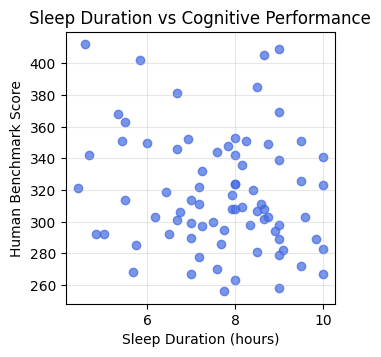

In [ ]:
print(f"Feature engineering complete!\n")
print(f"Total features: {len(df_encoded.columns)} columns")

# *** EXPLORATORY DATA ANALYSIS ***
print("\n📈 EXPLORATORY DATA ANALYSIS\n")

plt.figure(figsize=(16, 12))

# 1. Sleep Duration vs Cognitive Performance *
plt.subplot(3, 4, 1)
plt.scatter(df_encoded['Sleep_Duration_Hours'], df_encoded['Human_Benchmark_Score'],
           alpha=0.7, color='royalblue')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Human Benchmark Score')
plt.title('Sleep Duration vs Cognitive Performance')
plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Sleep Duration Distribution')

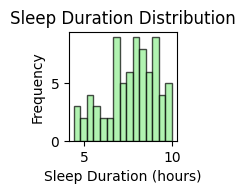

In [ ]:
# 2. Sleep Duration Distribution *
plt.subplot(3, 4, 2)
plt.hist(df_encoded['Sleep_Duration_Hours'], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.title('Sleep Duration Distribution')

(array([1, 2, 3, 4]),
 [Text(1, 0, 'Long'),
  Text(2, 0, 'Optimal'),
  Text(3, 0, 'Short'),
  Text(4, 0, 'Very_Short')])

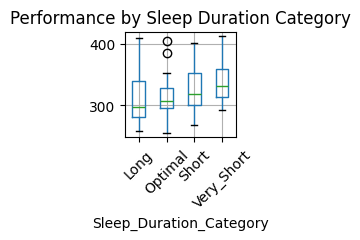

In [ ]:
# 3. Performance by Sleep Duration Category *
plt.subplot(3, 4, 3)
df_encoded.boxplot(column='Human_Benchmark_Score', by='Sleep_Duration_Category', ax=plt.gca())
plt.title('Performance by Sleep Duration Category')
plt.suptitle('')
plt.xticks(rotation=45)

Text(0, 0.5, 'Avg Score')

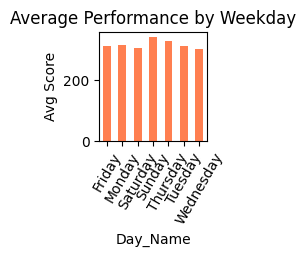

In [ ]:
# 4. Performance by Weekday *
plt.subplot(3, 4, 4)
weekday_performance = df_encoded.groupby('Day_Name')['Human_Benchmark_Score'].mean()
weekday_performance.plot(kind='bar', color='coral')
plt.title('Average Performance by Weekday')
plt.xticks(rotation=60)
plt.ylabel('Avg Score')

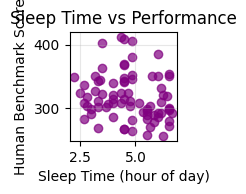

In [ ]:
# 5. Sleep Time vs Performance *
plt.subplot(3, 4, 5)
plt.scatter(df_encoded['Sleep_Time_Minutes']/60, df_encoded['Human_Benchmark_Score'],
           alpha=0.7, color='purple')
plt.xlabel('Sleep Time (hour of day)')
plt.ylabel('Human Benchmark Score')
plt.title('Sleep Time vs Performance')
plt.grid(True, alpha=0.3)

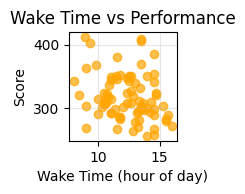

In [ ]:
# 6. Wake Time vs Performance *
plt.subplot(3, 4, 6)
plt.scatter(df_encoded['Wake_Time_Minutes']/60, df_encoded['Human_Benchmark_Score'],
           alpha=0.7, color='orange')
plt.xlabel('Wake Time (hour of day)')
plt.ylabel('Score')
plt.title('Wake Time vs Performance')
plt.grid(True, alpha=0.3)

(array([20162., 20179., 20193., 20209., 20223., 20240.]),
 [Text(20162.0, 0, '2025-03-15'),
  Text(20179.0, 0, '2025-04-01'),
  Text(20193.0, 0, '2025-04-15'),
  Text(20209.0, 0, '2025-05-01'),
  Text(20223.0, 0, '2025-05-15'),
  Text(20240.0, 0, '2025-06-01')])

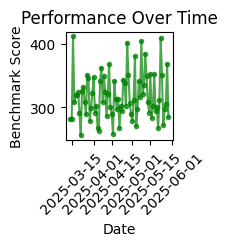

In [ ]:
# 7. Performance over time *
plt.subplot(3, 4, 7)
plt.plot(df_encoded['Start_Date'], df_encoded['Human_Benchmark_Score'],
         marker='o', markersize=3, alpha=0.7, color='green')
plt.title('Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Benchmark Score')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Sleep Duration Categories')

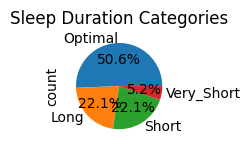

In [ ]:
# 8. Sleep Categories Distribution *
plt.subplot(3, 4, 8)
df_encoded['Sleep_Duration_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sleep Duration Categories')

Text(0, 0.5, 'Avg Score')

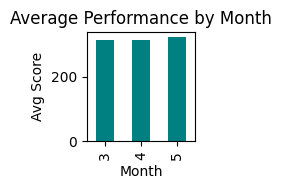

In [ ]:
# 9. Monthly Performance *
plt.subplot(3, 4, 9)
monthly_perf = df_encoded.groupby('Month')['Human_Benchmark_Score'].mean()
monthly_perf.plot(kind='bar', color='teal')
plt.title('Average Performance by Month')
plt.xlabel('Month')
plt.ylabel('Avg Score')

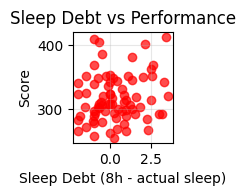

In [ ]:
# 10. Sleep Debt Impact *
plt.subplot(3, 4, 10)
plt.scatter(df_encoded['Sleep_Debt'], df_encoded['Human_Benchmark_Score'],
           alpha=0.7, color='red')
plt.xlabel('Sleep Debt (8h - actual sleep)')
plt.ylabel('Score')
plt.title('Sleep Debt vs Performance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\nPREPARING FEATURES TO MODEL")

# * Select features for modeling (excluding non-predictive columns) *
feature_columns = [col for col in df_encoded.columns if col not in [
    'Date_Range', 'Sleep_Time', 'Wake_Time', 'Total_Sleep', 'Human_Benchmark_Score',
    'Start_Date', 'End_Date', 'Day_Name', 'Sleep_Time_Category', 'Wake_Time_Category',
    'Sleep_Duration_Category'
]]

X = df_encoded[feature_columns]
y = df_encoded['Human_Benchmark_Score']


PREPARING FEATURES TO MODEL


In [ ]:
print(f"Features selected: {len(feature_columns)} features")
print(f"📋 Feature list: {feature_columns[:10]}...")

# *** TASK 1: REGRESSION - PREDICT BENCHMARK SCORE ***
print("\n" + "="*60)
print("TASK 1: REGRESSION - Predicting Human Benchmark Score")
print("="*60)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5)
}

model_results = {}

Features selected: 30 features
📋 Feature list: ['Sleep_Time_Minutes', 'Wake_Time_Minutes', 'Sleep_Duration_Hours', 'Weekday', 'Month', 'Is_Weekend', 'SleepTime_Early', 'SleepTime_Late', 'SleepTime_Normal', 'WakeTime_Early']...

TASK 1: REGRESSION - Predicting Human Benchmark Score


In [ ]:
print("Training and evaluating models...")
for name, model in models.items():
    if name in ['Linear Regression', 'K-Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    model_results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'predictions': y_pred
    }

    print(f"\n📊 {name} Results:")
    print(f"   MAE: {mae:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   R²: {r2:.4f}")

Training and evaluating models...

📊 Random Forest Results:
   MAE: 30.96
   RMSE: 39.53
   R²: -0.2847

📊 Decision Tree Results:
   MAE: 42.67
   RMSE: 52.98
   R²: -1.3072

📊 Linear Regression Results:
   MAE: 33.65
   RMSE: 41.24
   R²: -0.3982

📊 K-Neighbors Results:
   MAE: 33.29
   RMSE: 42.24
   R²: -0.4669



🏆 Best Model: Random Forest (R² = -0.2847)

📊 Creating Regression Visualizations...



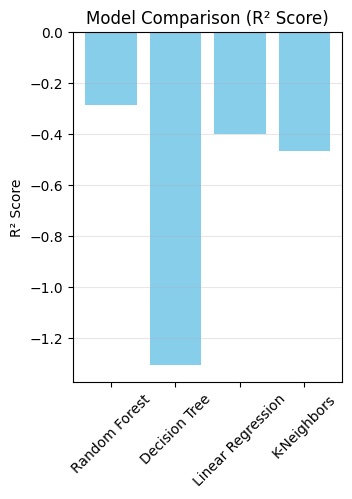

In [ ]:
# Find best model
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['R²'])
print(f"\n🏆 Best Model: {best_model_name} (R² = {model_results[best_model_name]['R²']:.4f})")

# *** REGRESSION VISUALIZATIONS ***
print("\n📊 Creating Regression Visualizations...\n")

plt.figure(figsize=(16, 10))

# * Model comparison *
plt.subplot(2, 4, 1)
model_scores = {name: results['R²'] for name, results in model_results.items()}
plt.bar(model_scores.keys(), model_scores.values(), color='skyblue')
plt.title('Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

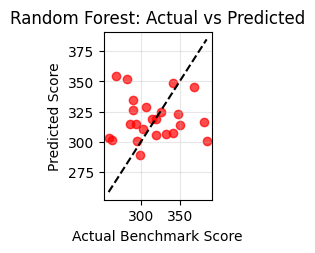

In [ ]:
# * Best model predictions *
plt.subplot(2, 4, 2)
best_predictions = model_results[best_model_name]['predictions']
plt.scatter(y_test, best_predictions, alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel('Actual Benchmark Score')
plt.ylabel('Predicted Score')
plt.title(f'{best_model_name}: Actual vs Predicted')
plt.grid(True, alpha=0.3)

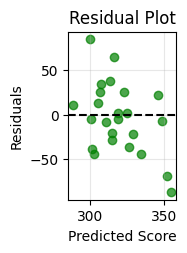

In [ ]:
# * Residuals *
plt.subplot(2, 4, 3)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

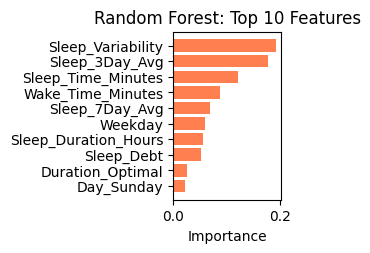

In [ ]:
# * Feature importance (for a tree-based model) *
if best_model_name in ['Random Forest', 'Decision Tree']:
    plt.subplot(2, 4, 4)
    if best_model_name == 'Random Forest':
        model = models['Random Forest']
        model.fit(X_train, y_train)
        importances = model.feature_importances_
    else:
        model = models['Decision Tree']
        model.fit(X_train, y_train)
        importances = model.feature_importances_

    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False).head(10)

    plt.barh(feature_importance['feature'], feature_importance['importance'], color='coral')
    plt.gca().invert_yaxis()
    plt.title(f'{best_model_name}: Top 10 Features')
    plt.xlabel('Importance')

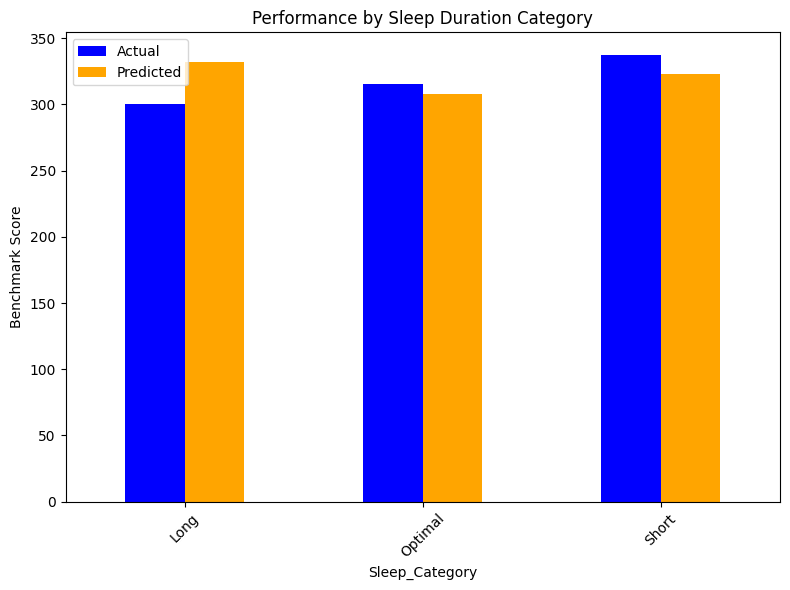

In [ ]:
# * Performance by sleep duration category *
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_predictions,
    'Sleep_Category': df_encoded.loc[y_test.index, 'Sleep_Duration_Category']
})

category_comparison = comparison_df.groupby('Sleep_Category')[['Actual', 'Predicted']].mean()
ax = category_comparison.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Performance by Sleep Duration Category')
plt.ylabel('Benchmark Score')
plt.xticks(rotation=45)
plt.legend(['Actual', 'Predicted'], loc='best')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Prediction Error Distribution')

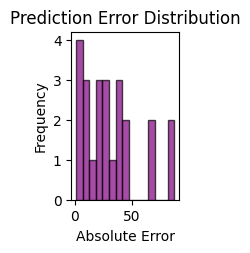

In [ ]:
# * Error distribution *
plt.subplot(2, 4, 6)
errors = np.abs(residuals)
plt.hist(errors, bins=15, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')

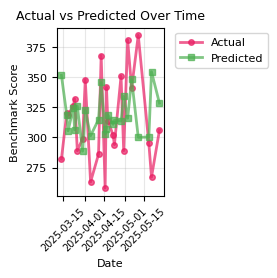

In [ ]:
# * Time series comparison *
plt.subplot(2, 4, 7)
test_dates = df_encoded.loc[y_test.index, 'Start_Date']
sorted_indices = test_dates.argsort()
plt.plot(test_dates.iloc[sorted_indices], y_test.iloc[sorted_indices],
         'o-', alpha=0.7, markersize=4, color='#E91E63', linewidth=2)
plt.plot(test_dates.iloc[sorted_indices], best_predictions[sorted_indices],
         's-', alpha=0.7, markersize=4, color='#4CAF50', linewidth=2)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Benchmark Score', fontsize=8)
plt.title('Actual vs Predicted Over Time', fontsize=9)
plt.legend(['Actual', 'Predicted'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=8)
plt.grid(True, alpha=0.3)

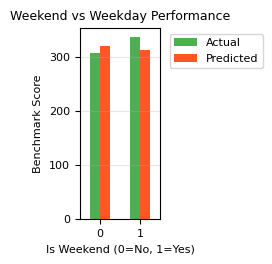

In [ ]:
# * Weekend vs Weekday performance *
plt.subplot(2, 4, 8)
weekend_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_predictions,
    'Is_Weekend': df_encoded.loc[y_test.index, 'Is_Weekend']
})
weekend_comparison = weekend_df.groupby('Is_Weekend')[['Actual', 'Predicted']].mean()
weekend_comparison.plot(kind='bar', ax=plt.gca(), color=['#4CAF50', '#FF5722'])
plt.title('Weekend vs Weekday Performance', fontsize=9)
plt.xlabel('Is Weekend (0=No, 1=Yes)', fontsize=8)
plt.ylabel('Benchmark Score', fontsize=8)
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(['Actual', 'Predicted'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# *** CLASSIFICATION - PREDICTING THE PERFORMANCE CATEGORIES ***
print("\n" + "="*60)
print("CLASSIFICATION - Predicting Performance Categories")
print("="*60)

def categorize_performance(score):
    if score < 290:
        return 'Low'
    elif score < 320:
        return 'Medium'
    elif score < 350:
        return 'High'
    else:
        return 'Very_High'

y_categories = df_encoded['Human_Benchmark_Score'].apply(categorize_performance)
print(f"Performance category distribution:")
print(y_categories.value_counts())


CLASSIFICATION - Predicting Performance Categories
Performance category distribution:
Human_Benchmark_Score
Medium       28
Low          17
High         17
Very_High    15
Name: count, dtype: int64


In [ ]:
# Train-test split for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_categories, test_size=0.3, random_state=42, stratify=y_categories
)

# Scale features for classification
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

# Classification models
cls_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Neighbors': KNeighborsClassifier(n_neighbors=5)
}

cls_results = {}

print("\n🔄 Training classification models...")
for name, model in cls_models.items():
    if name == 'K-Neighbors':
        model.fit(X_train_cls_scaled, y_train_cls)
        y_pred_cls = model.predict(X_test_cls_scaled)
        y_pred_proba = model.predict_proba(X_test_cls_scaled) if hasattr(model, 'predict_proba') else None
    else:
        model.fit(X_train_cls, y_train_cls)
        y_pred_cls = model.predict(X_test_cls)
        y_pred_proba = model.predict_proba(X_test_cls) if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test_cls, y_pred_cls)
    f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')

    cls_results[name] = {
        'Accuracy': accuracy,
        'F1_Score': f1,
        'predictions': y_pred_cls,
        'probabilities': y_pred_proba
    }

    print(f"\n📊 {name} Classification Results:")
    print(f"   Accuracy: {accuracy:.3f}")
    print(f"   F1-Score: {f1:.3f}")



🔄 Training classification models...

📊 Random Forest Classification Results:
   Accuracy: 0.375
   F1-Score: 0.347

📊 Decision Tree Classification Results:
   Accuracy: 0.375
   F1-Score: 0.359

📊 K-Neighbors Classification Results:
   Accuracy: 0.417
   F1-Score: 0.376


In [ ]:
# Find best classification model
best_cls_model = max(cls_results.keys(), key=lambda x: cls_results[x]['Accuracy'])
print(f"\nBest Classification Model: {best_cls_model} (Accuracy = {cls_results[best_cls_model]['Accuracy']:.3f})")

print(f"\n📋 Detailed Classification Report ({best_cls_model}):")
print(classification_report(y_test_cls, cls_results[best_cls_model]['predictions']))


Best Classification Model: K-Neighbors (Accuracy = 0.417)

📋 Detailed Classification Report (K-Neighbors):
              precision    recall  f1-score   support

        High       0.43      0.60      0.50         5
         Low       0.50      0.60      0.55         5
      Medium       0.40      0.44      0.42         9
   Very_High       0.00      0.00      0.00         5

    accuracy                           0.42        24
   macro avg       0.33      0.41      0.37        24
weighted avg       0.34      0.42      0.38        24



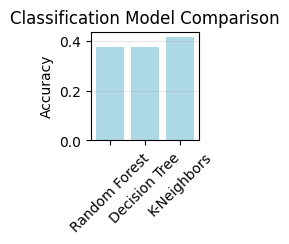

In [ ]:
# * Classification model comparison *
plt.subplot(3, 4, 1)
cls_accuracies = {name: results['Accuracy'] for name, results in cls_results.items()}
plt.bar(cls_accuracies.keys(), cls_accuracies.values(), color='lightblue')
plt.title('Classification Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'High'),
  Text(0, 1, 'Low'),
  Text(0, 2, 'Medium'),
  Text(0, 3, 'Very_High')])

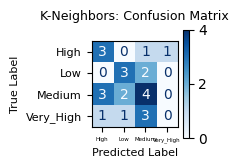

In [ ]:
# * Confusion Matrix *
plt.subplot(3, 4, 2)
cm = confusion_matrix(y_test_cls, cls_results[best_cls_model]['predictions'])
labels = sorted(y_categories.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=plt.gca(), values_format='d')
plt.title(f'{best_cls_model}: Confusion Matrix', fontsize=9, pad=15)
plt.xlabel('Predicted Label', fontsize=8)
plt.ylabel('True Label', fontsize=8)
plt.xticks(fontsize=4)
plt.yticks(fontsize=8)

In [ ]:
# Feature importance for classification
if best_cls_model in ['Random Forest', 'Decision Tree']:
    plt.subplot(3, 4, 3)
    if best_cls_model == 'Random Forest':
        cls_model = cls_models['Random Forest']
        cls_model.fit(X_train_cls, y_train_cls)
        cls_importances = cls_model.feature_importances_
    else:
        cls_model = cls_models['Decision Tree']
        cls_model.fit(X_train_cls, y_train_cls)
        cls_importances = cls_model.feature_importances_

    cls_feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': cls_importances
    }).sort_values('importance', ascending=False).head(10)

    plt.barh(cls_feature_importance['feature'], cls_feature_importance['importance'], color='orange')
    plt.gca().invert_yaxis()
    plt.title(f'{best_cls_model}: Top Features')
    plt.xlabel('Importance')

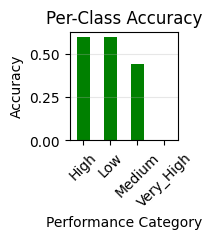

In [ ]:
# * Per-class accuracy *
plt.subplot(3, 4, 4)
class_accuracy = pd.DataFrame({
    'Actual': y_test_cls,
    'Predicted': cls_results[best_cls_model]['predictions']
})
class_accuracy['Correct'] = class_accuracy['Actual'] == class_accuracy['Predicted']
per_class_acc = class_accuracy.groupby('Actual')['Correct'].mean()
per_class_acc.plot(kind='bar', color='green')
plt.title('Per-Class Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Performance Category')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

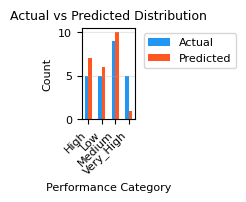

In [ ]:
# Actual vs Predicted distribution
plt.subplot(3, 4, 5)
all_categories = sorted(list(set(y_test_cls) | set(cls_results[best_cls_model]['predictions'])))
actual_counts = pd.Series(y_test_cls).value_counts().reindex(all_categories, fill_value=0)
predicted_counts = pd.Series(cls_results[best_cls_model]['predictions']).value_counts().reindex(all_categories, fill_value=0)

comparison_counts = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

plt.cla()
ax = plt.gca()
comparison_counts.plot(kind='bar', ax=ax, color=['#2196F3', '#FF5722'])
plt.title('Actual vs Predicted Distribution', fontsize=9)
plt.ylabel('Count', fontsize=8)
plt.xlabel('Performance Category', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.legend(['Actual', 'Predicted'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

(array([1, 2, 3, 4]),
 [Text(1, 0, 'High'),
  Text(2, 0, 'Low'),
  Text(3, 0, 'Medium'),
  Text(4, 0, 'Very_High')])

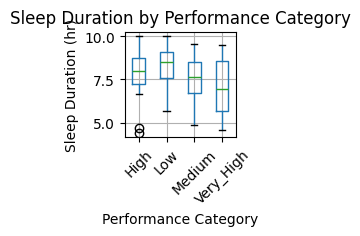

In [ ]:
# * Performance categories by sleep duration *
plt.subplot(3, 4, 6)
category_sleep = pd.DataFrame({
    'Performance_Category': y_categories,
    'Sleep_Duration': df_encoded['Sleep_Duration_Hours']
})
category_sleep.boxplot(column='Sleep_Duration', by='Performance_Category', ax=plt.gca())
plt.title('Sleep Duration by Performance Category')
plt.suptitle('')
plt.xlabel('Performance Category')
plt.ylabel('Sleep Duration (hr)')
plt.xticks(rotation=45)

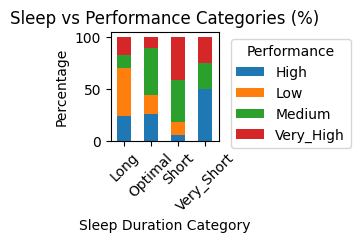

In [ ]:
# * Sleep categories vs Performance categories *
plt.subplot(3, 4, 7)
cross_tab = pd.crosstab(df_encoded['Sleep_Duration_Category'], y_categories)
cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_pct.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Sleep vs Performance Categories (%)')
plt.xlabel('Sleep Duration Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')

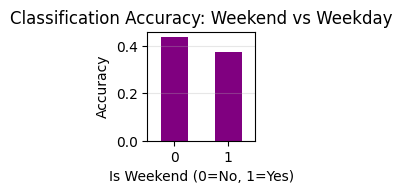

In [ ]:
# * Weekend vs Weekday classification performance *
plt.subplot(3, 4, 8)
weekend_cls_df = pd.DataFrame({
    'Actual': y_test_cls,
    'Predicted': cls_results[best_cls_model]['predictions'],
    'Is_Weekend': df_encoded.loc[y_test_cls.index, 'Is_Weekend']
})
weekend_cls_df['Correct'] = weekend_cls_df['Actual'] == weekend_cls_df['Predicted']
weekend_cls_acc = weekend_cls_df.groupby('Is_Weekend')['Correct'].mean()
weekend_cls_acc.plot(kind='bar', color='purple')
plt.title('Classification Accuracy: Weekend vs Weekday')
plt.xlabel('Is Weekend (0=No, 1=Yes)')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

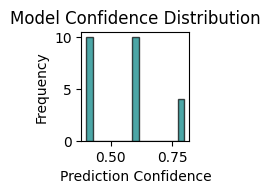

In [ ]:
# * Prediction confidence (if probabilities available) *
if cls_results[best_cls_model]['probabilities'] is not None:
    plt.subplot(3, 4, 9)
    probabilities = cls_results[best_cls_model]['probabilities']
    max_probs = np.max(probabilities, axis=1)
    plt.hist(max_probs, bins=15, color='teal', alpha=0.7, edgecolor='black')
    plt.xlabel('Prediction Confidence')
    plt.ylabel('Frequency')
    plt.title('Model Confidence Distribution')

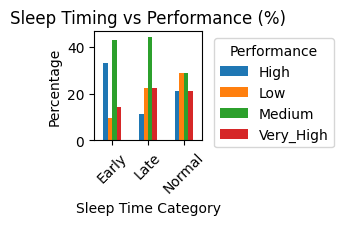

In [ ]:
# * Sleep timing vs Performance categories *
plt.subplot(3, 4, 10)
timing_perf = pd.DataFrame({
    'Sleep_Time_Category': df_encoded['Sleep_Time_Category'],
    'Performance_Category': y_categories
})
timing_cross = pd.crosstab(timing_perf['Sleep_Time_Category'], timing_perf['Performance_Category'])
timing_cross_pct = timing_cross.div(timing_cross.sum(axis=1), axis=0) * 100
timing_cross_pct.plot(kind='bar', ax=plt.gca())
plt.title('Sleep Timing vs Performance (%)')
plt.xlabel('Sleep Time Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')

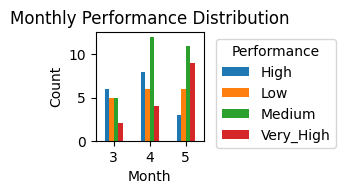

In [ ]:
# * Monthly performance classification *
plt.subplot(3, 4, 11)
monthly_cls = pd.DataFrame({
    'Month': df_encoded['Month'],
    'Performance_Category': y_categories
})
monthly_cross = pd.crosstab(monthly_cls['Month'], monthly_cls['Performance_Category'])
monthly_cross.plot(kind='bar', ax=plt.gca())
plt.title('Monthly Performance Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')

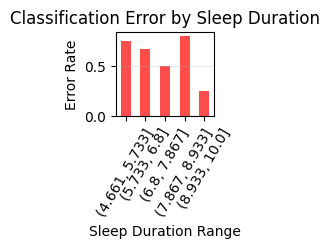

In [ ]:
# * Error analysis *
plt.subplot(3, 4, 12)
error_analysis = pd.DataFrame({
    'Actual': y_test_cls,
    'Predicted': cls_results[best_cls_model]['predictions'],
    'Sleep_Duration': df_encoded.loc[y_test_cls.index, 'Sleep_Duration_Hours']
})
error_analysis['Error'] = error_analysis['Actual'] != error_analysis['Predicted']
error_by_sleep = error_analysis.groupby(pd.cut(error_analysis['Sleep_Duration'], bins=5))['Error'].mean()
error_by_sleep.plot(kind='bar', color='red', alpha=0.7)
plt.title('Classification Error by Sleep Duration')
plt.xlabel('Sleep Duration Range')
plt.ylabel('Error Rate')
plt.xticks(rotation=60)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()